In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns


In [12]:
df = pd.read_csv("diario_bootcamp.csv")



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha         20 non-null     object
 1   texto         19 non-null     object
 2   n_palabras    20 non-null     int64 
 3   kw_ansiedad   20 non-null     int64 
 4   kw_cansad     20 non-null     int64 
 5   kw_agotad     20 non-null     int64 
 6   kw_miedo      20 non-null     int64 
 7   kw_confianza  20 non-null     int64 
 8   kw_feliz      20 non-null     int64 
 9   kw_examen     20 non-null     int64 
 10  kw_estudi     20 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 1.8+ KB


In [14]:
df["kw_triste"] = df["texto"].str.lower().str.count("trist")
df["kw_llorar"] = df["texto"].str.lower().str.count("llor")
df["kw_frustr"] = df["texto"].str.lower().str.count("frustr")


In [15]:
df.head(20)

,fecha,texto,n_palabras,kw_ansiedad,kw_cansad,kw_agotad,kw_miedo,kw_confianza,kw_feliz,kw_examen,kw_estudi,kw_triste,kw_llorar,kw_frustr
0,2025-11-09,El viernes 31 terminé el bootcamp y el 1 estab...,176,0,0,1,0,0,0,0,1,0.0,1.0,0.0
1,2025-10-15,Con ansiedad. Me he pasado todo el dia con ans...,101,2,0,0,0,1,0,0,0,0.0,0.0,0.0
2,2025-10-07,Hoy estoy mejor. Tengo menos ansiedad. Supongo...,278,1,1,0,0,0,0,2,3,0.0,0.0,0.0
3,2025-10-06,Yo pensé que a estas alturas estarías encontra...,169,0,0,1,0,0,0,1,0,0.0,0.0,1.0
4,2025-10-02,Me quedan 4 semanas para terminar el bootcamp....,184,0,0,0,0,0,0,0,0,0.0,0.0,0.0
5,2025-08-14,Esta semana empecé llorando en el bootcamp de ...,355,0,1,0,0,0,0,2,2,0.0,1.0,2.0
6,2025-08-07,Es jueves. Estoy cansada. Me he venido a hacer...,126,0,1,0,0,0,0,0,4,0.0,0.0,0.0
7,2025-08-06,No consigo acostarme antes de la 1 de la mañan...,163,1,1,1,0,1,0,0,1,0.0,0.0,0.0
8,2025-08-05,Estoy frustrada. Segundo dia en el bootcamp y ...,125,1,0,0,0,0,0,0,0,0.0,0.0,1.0
9,2025-08-02,Hoy fui inmensamente feliz cuando me di cuenta...,64,0,0,0,0,0,1,0,1,0.0,0.0,0.0


In [16]:
df.columns


Index(['fecha', 'texto', 'n_palabras', 'kw_ansiedad', 'kw_cansad', 'kw_agotad',
       'kw_miedo', 'kw_confianza', 'kw_feliz', 'kw_examen', 'kw_estudi',
       'kw_triste', 'kw_llorar', 'kw_frustr'],
      dtype='object')

In [17]:
df[df["kw_triste"].isna()]


,fecha,texto,n_palabras,kw_ansiedad,kw_cansad,kw_agotad,kw_miedo,kw_confianza,kw_feliz,kw_examen,kw_estudi,kw_triste,kw_llorar,kw_frustr
13,2025-06-15,NaN,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [24]:
df = df[df["texto"].notna()]
df = df[df["texto"].str.strip() != ""]


In [25]:
df[df["fecha"]=="2025-06-15"]


,fecha,texto,n_palabras,kw_ansiedad,kw_cansad,kw_agotad,kw_miedo,kw_confianza,kw_feliz,kw_examen,kw_estudi,kw_triste,kw_llorar,kw_frustr


In [26]:
df.shape


(19, 14)

In [27]:
df.head(20)

,fecha,texto,n_palabras,kw_ansiedad,kw_cansad,kw_agotad,kw_miedo,kw_confianza,kw_feliz,kw_examen,kw_estudi,kw_triste,kw_llorar,kw_frustr
0,2025-11-09,El viernes 31 terminé el bootcamp y el 1 estab...,176,0,0,1,0,0,0,0,1,0.0,1.0,0.0
1,2025-10-15,Con ansiedad. Me he pasado todo el dia con ans...,101,2,0,0,0,1,0,0,0,0.0,0.0,0.0
2,2025-10-07,Hoy estoy mejor. Tengo menos ansiedad. Supongo...,278,1,1,0,0,0,0,2,3,0.0,0.0,0.0
3,2025-10-06,Yo pensé que a estas alturas estarías encontra...,169,0,0,1,0,0,0,1,0,0.0,0.0,1.0
4,2025-10-02,Me quedan 4 semanas para terminar el bootcamp....,184,0,0,0,0,0,0,0,0,0.0,0.0,0.0
5,2025-08-14,Esta semana empecé llorando en el bootcamp de ...,355,0,1,0,0,0,0,2,2,0.0,1.0,2.0
6,2025-08-07,Es jueves. Estoy cansada. Me he venido a hacer...,126,0,1,0,0,0,0,0,4,0.0,0.0,0.0
7,2025-08-06,No consigo acostarme antes de la 1 de la mañan...,163,1,1,1,0,1,0,0,1,0.0,0.0,0.0
8,2025-08-05,Estoy frustrada. Segundo dia en el bootcamp y ...,125,1,0,0,0,0,0,0,0,0.0,0.0,1.0
9,2025-08-02,Hoy fui inmensamente feliz cuando me di cuenta...,64,0,0,0,0,0,1,0,1,0.0,0.0,0.0


In [28]:
kw_cols = [c for c in df.columns if c.startswith("kw_")]
df[kw_cols] = df[kw_cols].fillna(0).astype(int)
df["n_palabras"] = df["n_palabras"].fillna(0).astype(int)


In [29]:
df.head(20)

,fecha,texto,n_palabras,kw_ansiedad,kw_cansad,kw_agotad,kw_miedo,kw_confianza,kw_feliz,kw_examen,kw_estudi,kw_triste,kw_llorar,kw_frustr
0,2025-11-09,El viernes 31 terminé el bootcamp y el 1 estab...,176,0,0,1,0,0,0,0,1,0,1,0
1,2025-10-15,Con ansiedad. Me he pasado todo el dia con ans...,101,2,0,0,0,1,0,0,0,0,0,0
2,2025-10-07,Hoy estoy mejor. Tengo menos ansiedad. Supongo...,278,1,1,0,0,0,0,2,3,0,0,0
3,2025-10-06,Yo pensé que a estas alturas estarías encontra...,169,0,0,1,0,0,0,1,0,0,0,1
4,2025-10-02,Me quedan 4 semanas para terminar el bootcamp....,184,0,0,0,0,0,0,0,0,0,0,0
5,2025-08-14,Esta semana empecé llorando en el bootcamp de ...,355,0,1,0,0,0,0,2,2,0,1,2
6,2025-08-07,Es jueves. Estoy cansada. Me he venido a hacer...,126,0,1,0,0,0,0,0,4,0,0,0
7,2025-08-06,No consigo acostarme antes de la 1 de la mañan...,163,1,1,1,0,1,0,0,1,0,0,0
8,2025-08-05,Estoy frustrada. Segundo dia en el bootcamp y ...,125,1,0,0,0,0,0,0,0,0,0,1
9,2025-08-02,Hoy fui inmensamente feliz cuando me di cuenta...,64,0,0,0,0,0,1,0,1,0,0,0


In [35]:

# 2. Convertir fecha a formato datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# 3. Eliminar filas sin texto
df = df[df["texto"].notna()]
df = df[df["texto"].str.strip() != ""]

# 4. Eliminar filas sin fecha válida
df = df[df["fecha"].notna()]

# 5. Normalizar columnas kw_ a enteros
kw_cols = [c for c in df.columns if c.startswith("kw_")]
df[kw_cols] = df[kw_cols].fillna(0).astype(int)

# 6. Ordenar por fecha
df = df.sort_values("fecha")

# 7. Resetear índice
df = df.reset_index(drop=True)

df. describe()


,fecha,n_palabras,kw_ansiedad,kw_cansad,kw_agotad,kw_miedo,kw_confianza,kw_feliz,kw_examen,kw_estudi,kw_triste,kw_llorar,kw_frustr
count,19,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000
mean,2025-07-28 20:12:37.894736896,231.473684,0.263158,0.263158,0.263158,0.210526,0.210526,0.263158,0.263158,0.842105,0.0,0.157895,0.210526
min,2025-05-12 00:00:00,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2025-05-28 12:00:00,127.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2025-08-02 00:00:00,184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2025-09-07 12:00:00,311.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
max,2025-11-09 00:00:00,522.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,0.0,1.000000,2.000000
std,NaN,137.705147,0.561951,0.452414,0.452414,0.535303,0.535303,0.561951,0.653376,1.167293,0.0,0.374634,0.535303


In [36]:
# Asegúrate de que fecha es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna mes
df["mes"] = df["fecha"].dt.to_period("M")

# Crear índice de emoción negativa
df["emocion_negativa"] = (
    df["kw_ansiedad"] +
    df["kw_miedo"] +
    df["kw_triste"] +
    df["kw_llorar"] +
    df["kw_frustr"] +
    df["kw_cansad"] +
    df["kw_agotad"]
)

# Agrupar por mes
df_mensual = df.groupby("mes")[["emocion_negativa"]].sum().reset_index()

df_mensual


,mes,emocion_negativa
0,2025-05,7
1,2025-07,1
2,2025-08,10
3,2025-10,6
4,2025-11,2


In [39]:
df_mensual = df.groupby("mes")["emocion_negativa"].mean().reset_index()


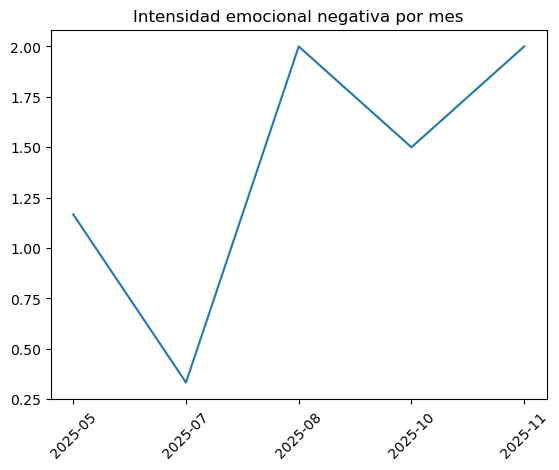

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_mensual["mes"].astype(str), df_mensual["emocion_negativa"])
plt.xticks(rotation=45)
plt.title("Intensidad emocional negativa por mes")
plt.show()


In [41]:
# Correlación entre emoción negativa y estudio/examen
df[["emocion_negativa", "kw_estudi", "kw_examen"]].corr()


,emocion_negativa,kw_estudi,kw_examen
emocion_negativa,1.000000,0.167742,0.522521
kw_estudi,0.167742,1.000000,0.421719
kw_examen,0.522521,0.421719,1.000000


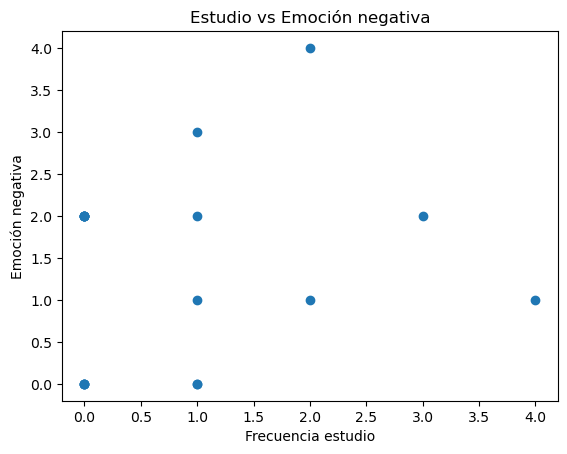

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["kw_estudi"], df["emocion_negativa"])
plt.xlabel("Frecuencia estudio")
plt.ylabel("Emoción negativa")
plt.title("Estudio vs Emoción negativa")
plt.show()


Lectura clave:
Correlación emoción_negativa vs examen ≈ 0.52 → relación moderada positiva.
Eso sugiere que cuando aparece “examen”, aumenta emoción negativa.
Correlación con “estudiar” es baja (~0.16) → estudiar en sí no dispara tanto la emoción.
No es el estudio constante lo que genera estrés, sino los hitos evaluativos.

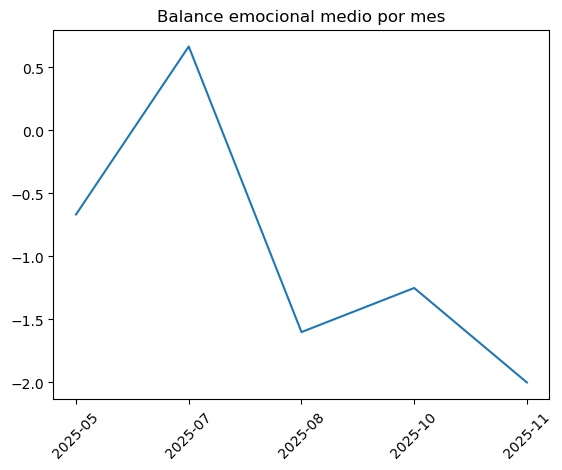

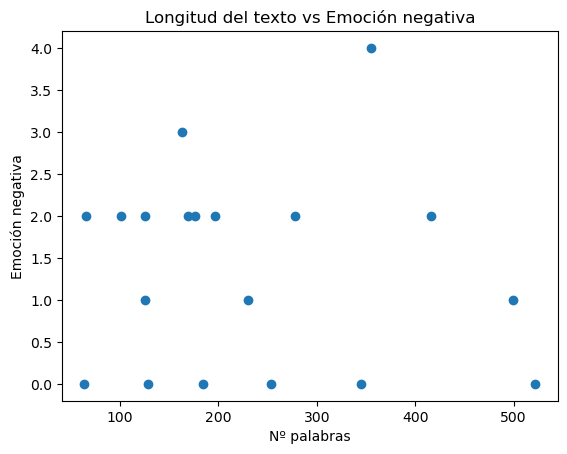

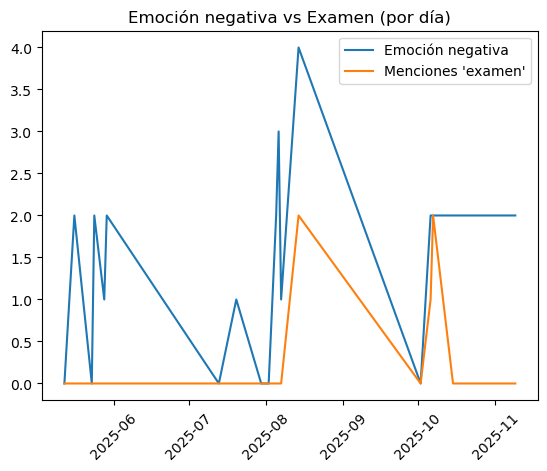

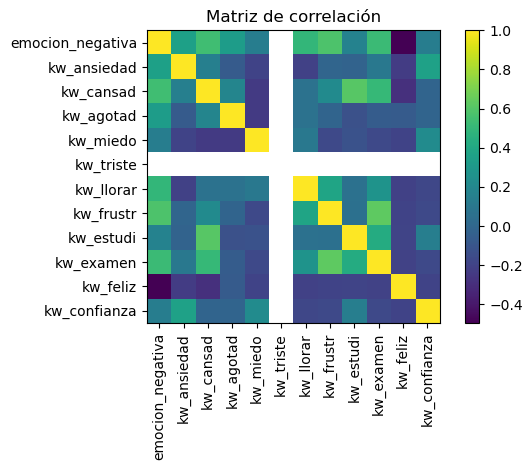

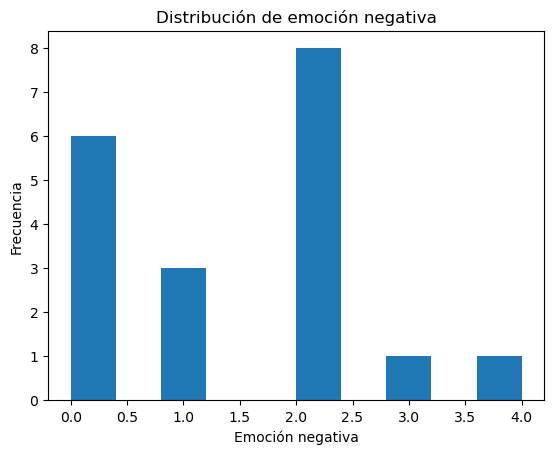

In [43]:
# Asegura orden
df = df.sort_values("fecha").reset_index(drop=True)

# 1) Balance emocional (neg - pos) por mes
df["emocion_positiva"] = df[["kw_feliz","kw_confianza"]].sum(axis=1)
df["balance"] = df["emocion_positiva"] - df["emocion_negativa"]
df["mes"] = pd.to_datetime(df["fecha"]).dt.to_period("M")

m = df.groupby("mes")[["emocion_negativa","emocion_positiva","balance"]].mean().reset_index()
plt.figure(); plt.plot(m["mes"].astype(str), m["balance"]); plt.xticks(rotation=45); plt.title("Balance emocional medio por mes"); plt.show()

# 2) Longitud del texto vs emoción negativa
plt.figure(); plt.scatter(df["n_palabras"], df["emocion_negativa"]); plt.xlabel("Nº palabras"); plt.ylabel("Emoción negativa"); plt.title("Longitud del texto vs Emoción negativa"); plt.show()

# 3) Timeline: emoción negativa y menciones a examen
plt.figure()
plt.plot(df["fecha"], df["emocion_negativa"], label="Emoción negativa")
plt.plot(df["fecha"], df["kw_examen"], label="Menciones 'examen'")
plt.xticks(rotation=45); plt.title("Emoción negativa vs Examen (por día)"); plt.legend(); plt.show()

# 4) Heatmap simple de correlación (sin seaborn)
cols = ["emocion_negativa","kw_ansiedad","kw_cansad","kw_agotad","kw_miedo","kw_triste","kw_llorar","kw_frustr","kw_estudi","kw_examen","kw_feliz","kw_confianza"]
corr = df[cols].corr(numeric_only=True)

plt.figure()
plt.imshow(corr.values)
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
plt.title("Matriz de correlación")
plt.colorbar()
plt.tight_layout()
plt.show()

# 5) Histograma de emoción negativa
plt.figure(); plt.hist(df["emocion_negativa"]); plt.title("Distribución de emoción negativa"); plt.xlabel("Emoción negativa"); plt.ylabel("Frecuencia"); plt.show()

La mayoría de tus días están en 0–2 → negatividad baja a moderada.
Hay muy pocos días en 3–4 → picos puntuales, no estado constante.

Eso es interesante narrativamente: el bootcamp fue intenso, pero no permanentemente negativo.

El estrés parece concentrarse en momentos específicos (examen), no como estado sostenido.

In [44]:
df["emocion_positiva"] = df[["kw_feliz","kw_confianza"]].sum(axis=1)


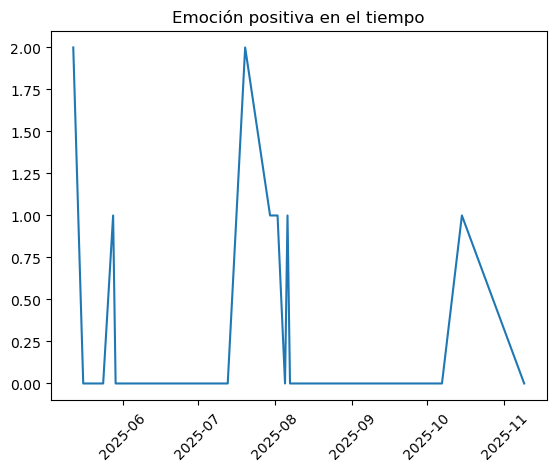

In [45]:
plt.figure()
plt.plot(df["fecha"], df["emocion_positiva"])
plt.xticks(rotation=45)
plt.title("Emoción positiva en el tiempo")
plt.show()


Hay picos puntuales (inicio ilusionado, algún momento de logro).
La mayor parte del tiempo la línea está en 0 → no significa que no hubiera emoción positiva, sino que no la verbalizaste con esas palabras concretas.

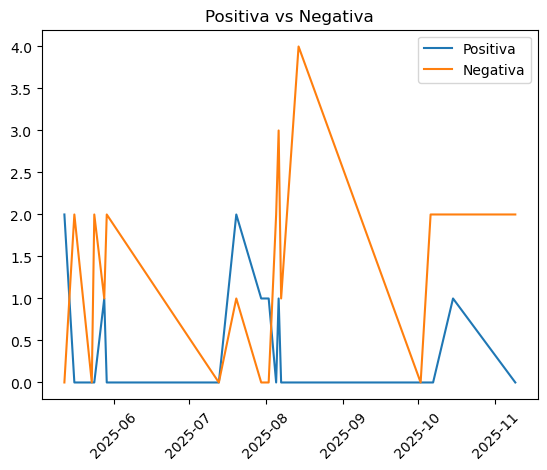

In [46]:
plt.figure()
plt.plot(df["fecha"], df["emocion_positiva"], label="Positiva")
plt.plot(df["fecha"], df["emocion_negativa"], label="Negativa")
plt.legend()
plt.xticks(rotation=45)
plt.title("Positiva vs Negativa")
plt.show()


En varios momentos se cruzan → coexisten emociones positivas y negativas (ambivalencia).
Agosto muestra pico fuerte de negatividad con poca positividad → fase crítica del bootcamp.
Noviembre mantiene negatividad moderada pero reaparece algo positivo → resiliencia.

Insight potente: no fue un proceso lineal; hubo tensión y crecimiento simultáneos.